In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

train_file = "./data/sign_mnist_train.csv"
test_file = "./data/sign_mnist_test.csv"

# Load data
train_data = np.loadtxt(train_file, delimiter=",", skiprows=1)
test_data = np.loadtxt(test_file, delimiter=",", skiprows=1)


### Clean up data and split into test and training set

In [8]:

# Split data into features and labels
targets1 = train_data[:, 0]
data1 = train_data[:, 1:]
targets2 = test_data[:, 0]
data2 = test_data[:, 1:]

X = np.append(data1, data2, axis=0)
y = np.append(targets1, targets2, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y) 

# Normalize data
X_train = X_train / 255
X_test = X_test / 255

[[0.4627451  0.48627451 0.51764706 ... 0.15294118 0.14509804 0.1254902 ]
 [0.5372549  0.54509804 0.56470588 ... 0.81568627 0.81568627 0.81176471]
 [0.74117647 0.75294118 0.75294118 ... 0.39607843 0.36078431 0.3372549 ]]


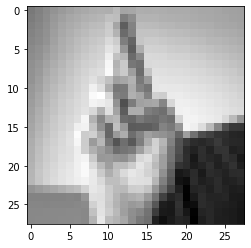

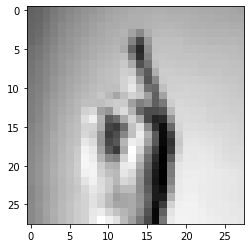

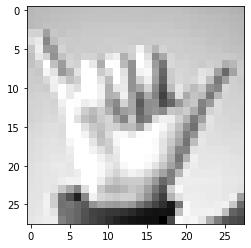

In [9]:
# display some images

# https://medium.com/the-data-science-publication/how-to-plot-mnist-digits-using-matplotlib-65a2e0cc068
# pick a sample to plot
samples = [1, 3, 90]
images = X_train[samples]
print(images)
images = [i.reshape(28, 28) for i in images]

# plot the sample
fig = plt.figure
for image in images:
    plt.imshow(image, cmap='gray')
    plt.show()

### Effects of PCA on the images

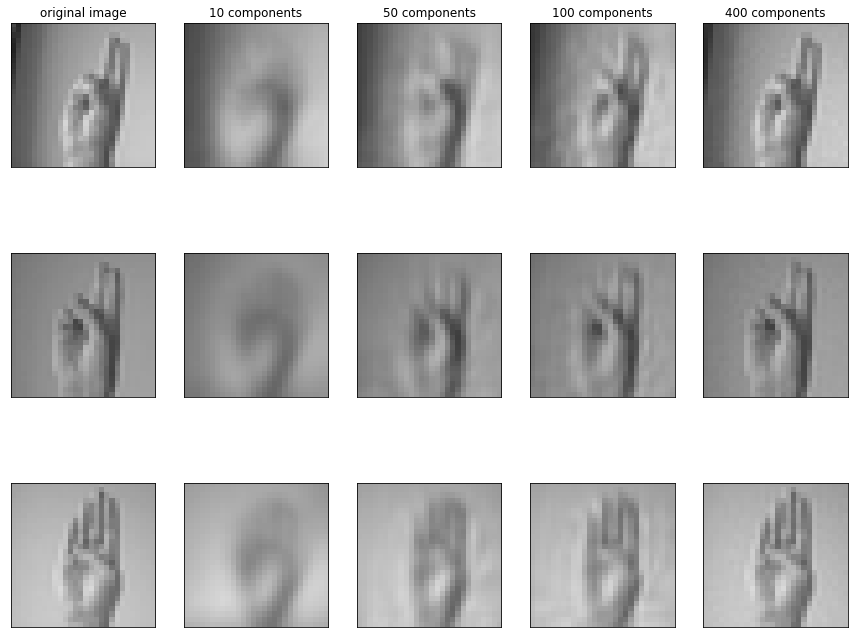

In [10]:
image_shape = images[0].shape

reduced_images = []
n_c = [10, 50, 100, 400]
for n_components in n_c:
    # build the NMF model
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    # transform the test data (afterwards has n_components many dimensions)
    X_test_pca = pca.transform(X_test)
    # back-transform the transformed test-data
    # (afterwards it's in the original space again)
    X_test_back = pca.inverse_transform(X_test_pca)
    reduced_images.append(X_test_back)

# plot the first three images in the test set:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes):
    # plot original image
    ax[0].imshow(X_test[i].reshape(image_shape),
                 vmin=0, vmax=1, cmap='gray')
    # plot the four back-transformed images
    for a, X_test_back in zip(ax[1:], reduced_images):
        a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1, cmap='gray')

# label the top row
axes[0, 0].set_title("original image")
for ax, n_components in zip(axes[0, 1:], n_c):
    ax.set_title("%d components" % n_components)

### Run this cell to use PCA in all the tests

In [11]:
from sklearn.decomposition import PCA

# 392 components
pca = PCA(n_components=392).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

tic = time.perf_counter()

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

# y_knn_pred = knn_model.predict(X_test)

print("KNN, n = 5")
print("Training set score: {:.3f}".format(knn_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn_model.score(X_test, y_test)))

toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")


KNN, n = 5
Training set score: 0.999
Test set score: 0.997
Time taken: 70.404 seconds


### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression


In [14]:

tic = time.perf_counter()
# Create model
ovr_model = LogisticRegression(multi_class="ovr", solver="liblinear", C=10)

# Train model
ovr_model.fit(X_train, y_train)

# Evaluate
print("OVR")
print("Training set score: {:.3f}".format(ovr_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ovr_model.score(X_test, y_test)))
toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")


OVR
Training set score: 1.000
Test set score: 1.000
Time taken: 122.014 seconds


In [15]:
tic = time.perf_counter()
softmax_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

softmax_model.fit(X_train, y_train)

print("Softmax")
print("Training set score: {:.3f}".format(softmax_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(softmax_model.score(X_test, y_test)))
toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")

Softmax
Training set score: 1.000
Test set score: 1.000
Time taken: 11.947 seconds


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### Testing different levels of pca

In [21]:
images2 = X_train[samples]

image_shape = images2[0].shape

reduced_images = []
n_c = [10, 50, 100]
for n_components in n_c:
    # build the NMF model
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    # transform the test data (afterwards has n_components many dimensions)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    tic = time.perf_counter()
    softmax_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

    softmax_model.fit(X_train_pca, y_train)

    print("Softmax " + str(n_components) + " components")
    print("Training set score: {:.3f}".format(softmax_model.score(X_train_pca, y_train)))
    print("Test set score: {:.3f}".format(softmax_model.score(X_test_pca, y_test)))
    toc = time.perf_counter()
    print(f"Time taken: {toc-tic:.3f} seconds")

Softmax 10 components
Training set score: 0.444
Test set score: 0.444
Time taken: 6.819 seconds


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Softmax 50 components
Training set score: 0.888
Test set score: 0.876
Time taken: 7.409 seconds
Softmax 100 components
Training set score: 1.000
Test set score: 0.998
Time taken: 7.817 seconds


/usr/local/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ValueError: n_components=400 must be between 0 and min(n_samples, n_features)=392 with svd_solver='full'

In [22]:
from sklearn import svm

tic = time.perf_counter()

svm_model = svm.SVC(kernel='linear', C=1.0)

svm_model.fit(X_train, y_train)

print("SVM")
print("Training set score: {:.3f}".format(svm_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_model.score(X_test, y_test)))

toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")

SVM
Training set score: 1.000
Test set score: 1.000
Time taken: 67.280 seconds


In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

tic = time.perf_counter()

gm_model = GaussianMixture(n_components=24)

gm_model.fit(X_train, y_train)

print("GMM")
train_labels = gm_model.score(X_train, y_train)
test_labels = gm_model.score(X_test, y_test)
accuracy_score_tr = accuracy_score(train_labels, y_train)
accuracy_score_te = accuracy_score(test_labels, y_test)
print("Training set score: {:.3f}".format(accuracy_score_tr))
print("Test set score: {:.3f}".format(accuracy_score_te))

toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")

GMM


TypeError: Singleton array 1258.8494797015462 cannot be considered a valid collection.

In [24]:
from sklearn.neural_network import MLPClassifier

tic = time.perf_counter()
mlp = MLPClassifier(solver='adam', random_state=0, hidden_layer_sizes=[100, 100, 100, 100, 100], alpha=0.000000000001)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))
toc = time.perf_counter()
print(f"Time taken: {toc-tic:.3f} seconds")

Accuracy on training set: 1.000
Accuracy on test set: 1.000
Time taken: 19.102 seconds
